# Importing Necessary Libraries

In [1]:
import os
from pathlib import Path, PurePath

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [2]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

# Data Peeking, organizing, replacing, preprocessing ....

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
len_of_df = df.shape
len_of_df

(7043, 21)

In [9]:
features = list(df.columns)

In [10]:
data = []

for feature in features:
    data.append({
        "column_name": feature,
        'unique_value_count': len(np.unique(df[feature])),
        'total_count': len(df),
        'unique_values': np.unique(df[feature]),
        'Datatype': df[feature].dtype
    })

data

[{'column_name': 'customerID',
  'unique_value_count': 7043,
  'total_count': 7043,
  'unique_values': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
         '9993-LHIEB', '9995-HOTOH'], dtype=object),
  'Datatype': dtype('O')},
 {'column_name': 'gender',
  'unique_value_count': 2,
  'total_count': 7043,
  'unique_values': array(['Female', 'Male'], dtype=object),
  'Datatype': dtype('O')},
 {'column_name': 'SeniorCitizen',
  'unique_value_count': 2,
  'total_count': 7043,
  'unique_values': array([0, 1]),
  'Datatype': dtype('int64')},
 {'column_name': 'Partner',
  'unique_value_count': 2,
  'total_count': 7043,
  'unique_values': array(['No', 'Yes'], dtype=object),
  'Datatype': dtype('O')},
 {'column_name': 'Dependents',
  'unique_value_count': 2,
  'total_count': 7043,
  'unique_values': array(['No', 'Yes'], dtype=object),
  'Datatype': dtype('O')},
 {'column_name': 'tenure',
  'unique_value_count': 73,
  'total_count': 7043,
  'unique_values': array([ 0,  1,  

In [11]:
def change_dtype(x):
    if x == ' ':
        x = 0
    else:
        x = float(x)
    return x

In [12]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:change_dtype(x))

In [13]:
df['TotalCharges'].dtype

dtype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Viz

In [15]:
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

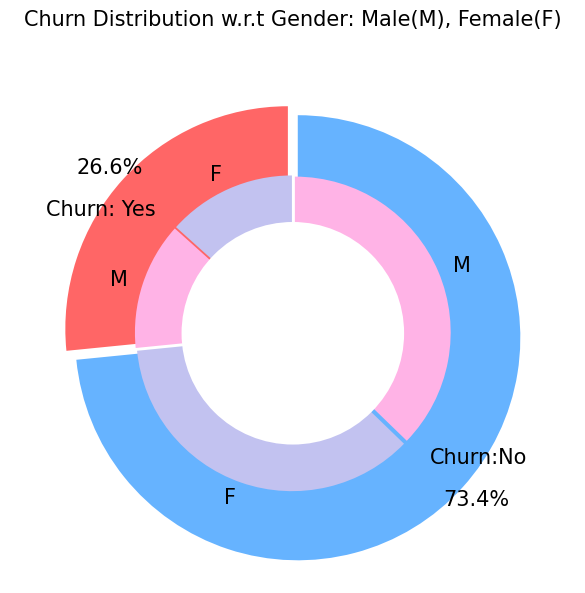

In [16]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [17]:
cols = list(df.columns)

In [18]:
len(cols)

21

In [19]:
cols.remove("customerID")
cols.remove("Churn")

In [20]:
len(cols)

19

In [21]:
y = df[["customerID", "Churn"]]
y.shape

(7043, 2)

In [22]:
x = df[cols]
x.shape

(7043, 19)

In [23]:
x1 = pd.get_dummies(x)

In [24]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   bool   
 5   gender_Male                              7043 non-null   bool   
 6   Partner_No                               7043 non-null   bool   
 7   Partner_Yes                              7043 non-null   bool   
 8   Dependents_No                            7043 non-null   bool   
 9   Dependents_Yes                           7043 non-null   bool   
 10  PhoneService_No                          7043 no

In [25]:
y['Churn'] = y['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipykernel_47/2953999869.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df1 = pd.concat([x1, y.Churn], axis=1)
df1.shape

(7043, 46)

<Axes: >

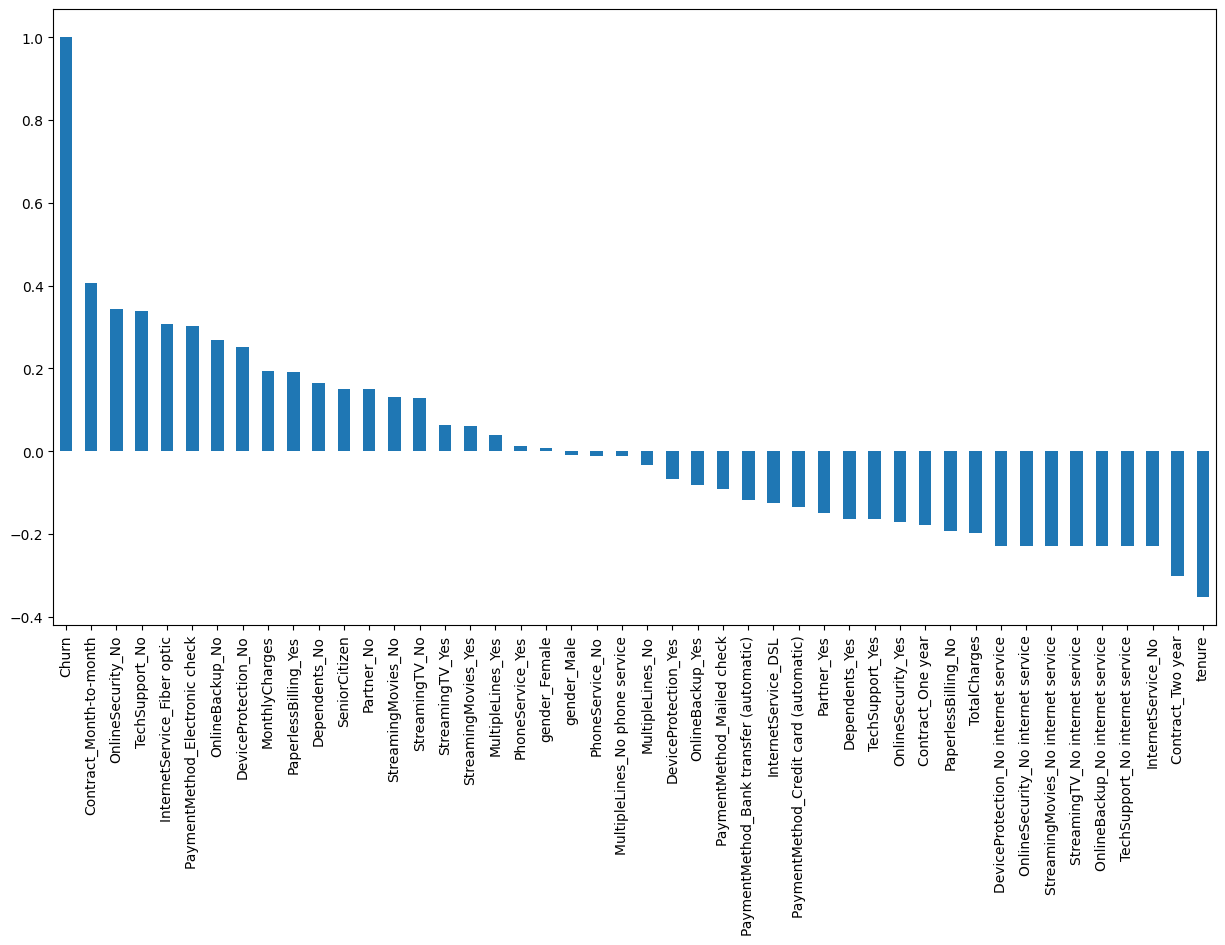

In [27]:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [28]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,...,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477,0.150889
tenure,0.016567,1.000000,0.247900,0.826178,-0.005106,0.005106,-0.379697,0.379697,-0.159712,0.159712,...,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.014569,-0.014569,-0.096848,0.096848,0.113890,-0.113890,...,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437,0.193356
TotalCharges,0.103006,0.826178,0.651174,1.000000,0.000080,-0.000080,-0.317504,0.317504,-0.062078,0.062078,...,-0.444255,0.170814,0.354481,-0.158574,0.158574,0.185987,0.182915,-0.059246,-0.295758,-0.198324
gender_Female,0.001874,-0.005106,0.014569,0.000080,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,...,0.003386,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744,0.008612
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,-1.000000,1.000000,0.001808,-0.001808,-0.010517,0.010517,...,-0.003386,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744,-0.008612
Partner_No,-0.016479,-0.379697,-0.096848,-0.317504,-0.001808,0.001808,1.000000,-1.000000,0.452676,-0.452676,...,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125,0.150448
Partner_Yes,0.016479,0.379697,0.096848,0.317504,0.001808,-0.001808,-1.000000,1.000000,-0.452676,0.452676,...,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125,-0.150448
Dependents_No,0.211185,-0.159712,0.113890,-0.062078,0.010517,-0.010517,0.452676,-0.452676,1.000000,-1.000000,...,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071,0.164221
Dependents_Yes,-0.211185,0.159712,-0.113890,0.062078,-0.010517,0.010517,-0.452676,0.452676,-1.000000,1.000000,...,-0.231720,0.068368,0.204613,0.111377,-0.111377,0.052021,0.060267,-0.150642,0.059071,-0.164221


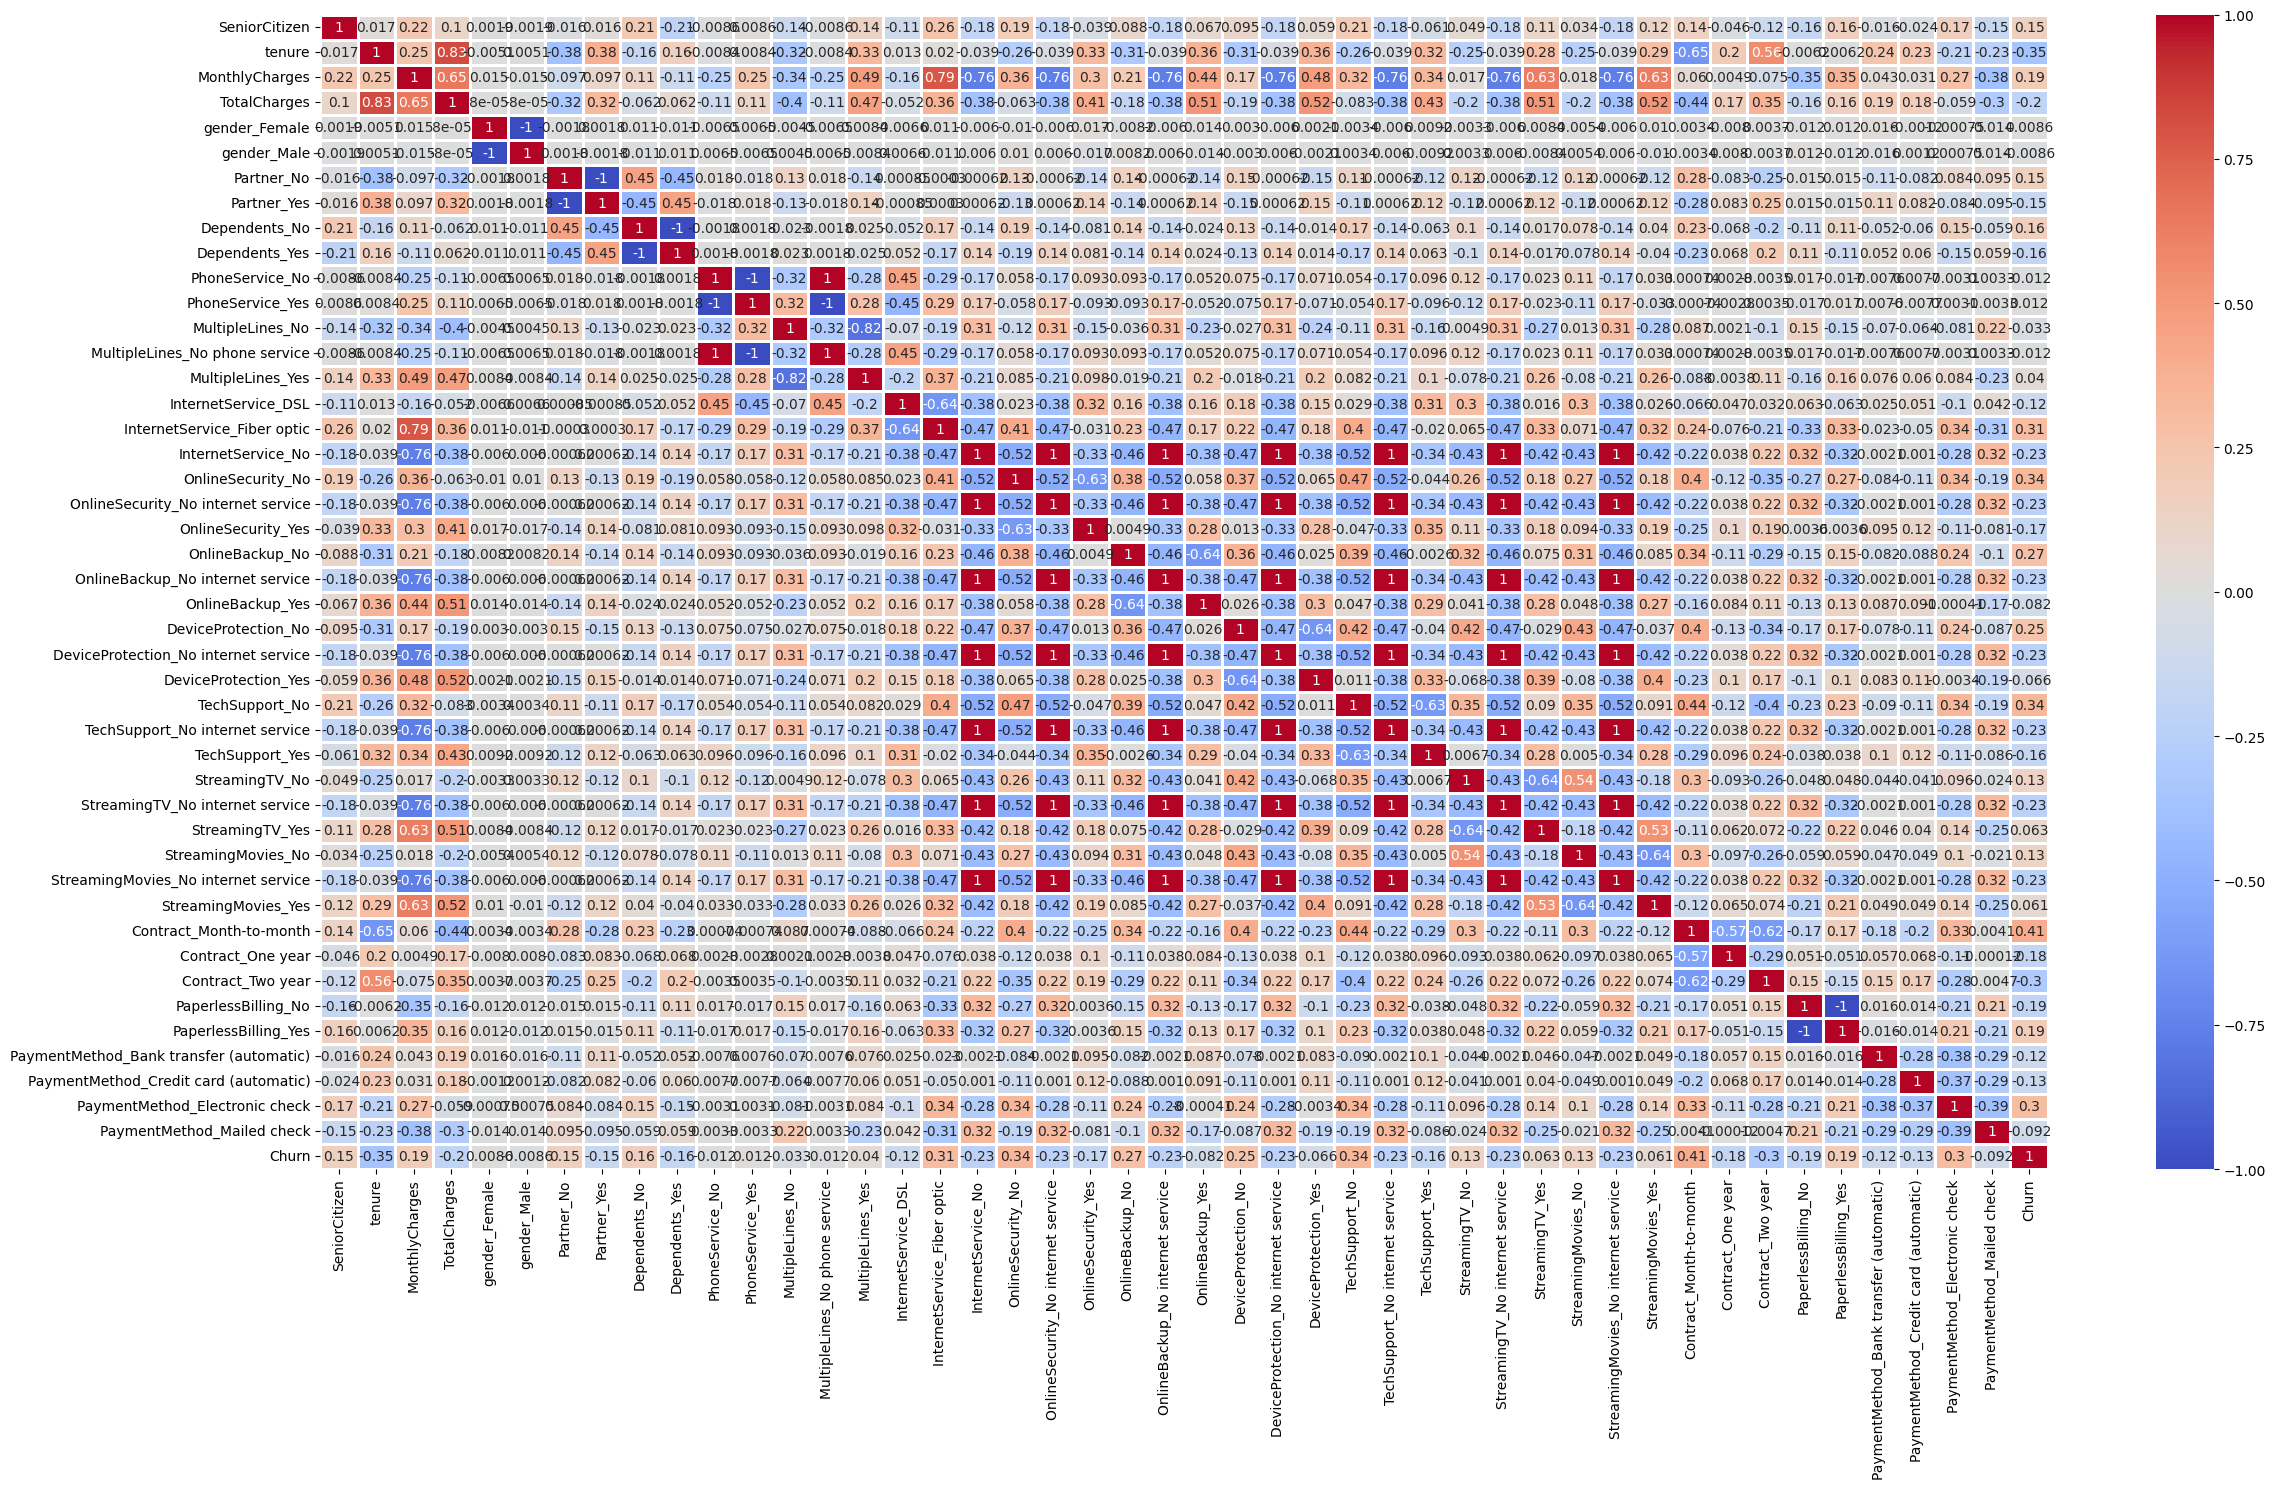

In [29]:
plt.figure(figsize=(25, 15))
sns.heatmap(
    df1.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=2
)

plt.tight_layout()

plt.show()

### Bar Plot

In [30]:
def barplot(col_name, y_label, x_label, title):
    colors = ['#4D3425','#E4512B']
    ax = (df[col_name].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0, color = colors)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_x()+.15, i.get_height()-3.5, \
                str(round((i.get_height()/total), 1))+'%',
                fontsize=12,
                color='white',
               weight = 'bold')

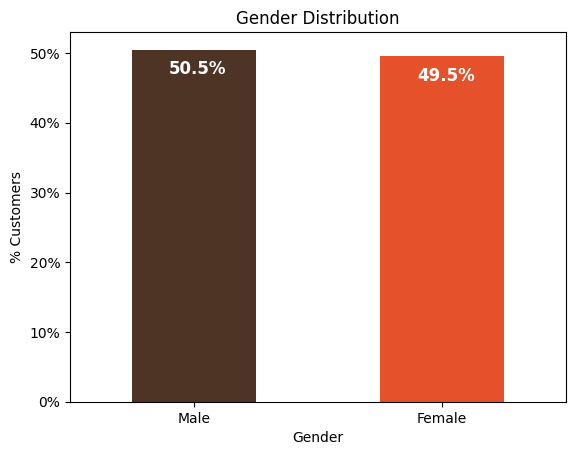

In [31]:
barplot('gender', '% Customers', 'Gender', 'Gender Distribution')

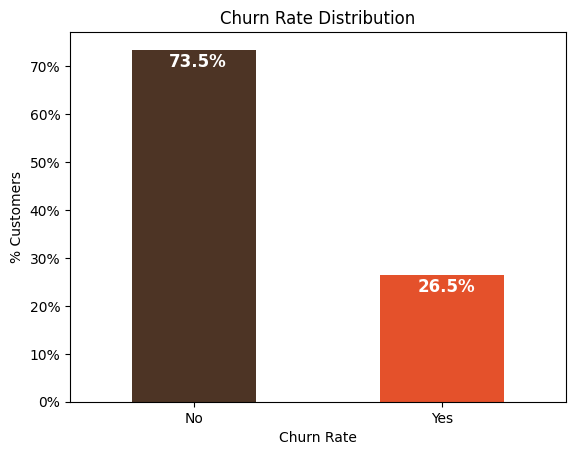

In [32]:
barplot('Churn', '% Customers', 'Churn Rate', 'Churn Rate Distribution')

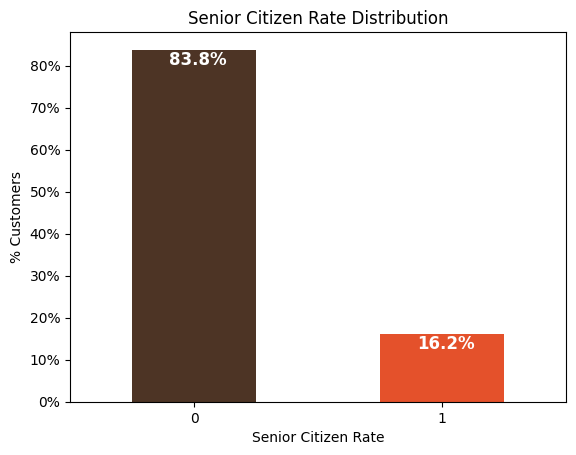

In [33]:
barplot('SeniorCitizen', '% Customers', 'Senior Citizen Rate', 'Senior Citizen Rate Distribution')

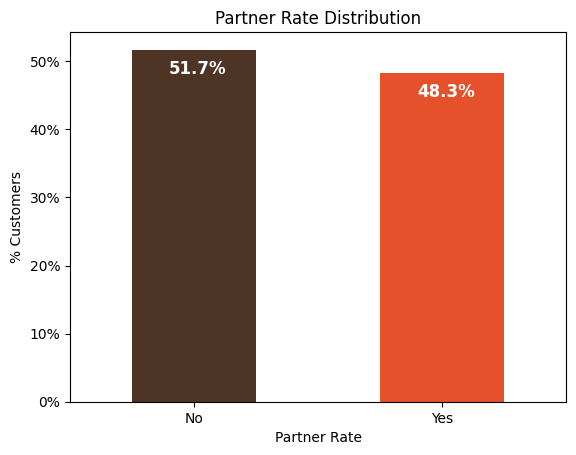

In [34]:
barplot('Partner', '% Customers', 'Partner Rate', 'Partner Rate Distribution')

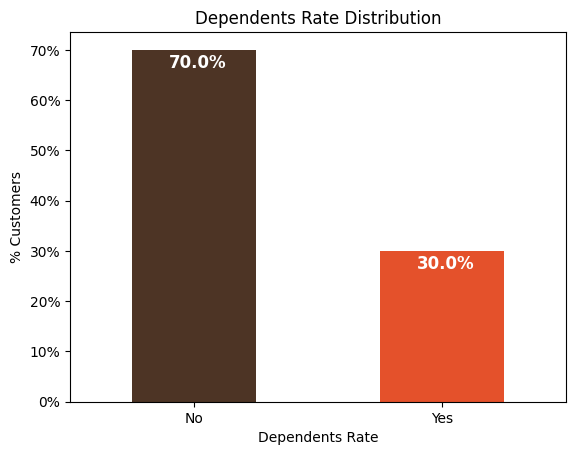

In [35]:
barplot('Dependents', '% Customers', 'Dependents Rate', 'Dependents Rate Distribution')

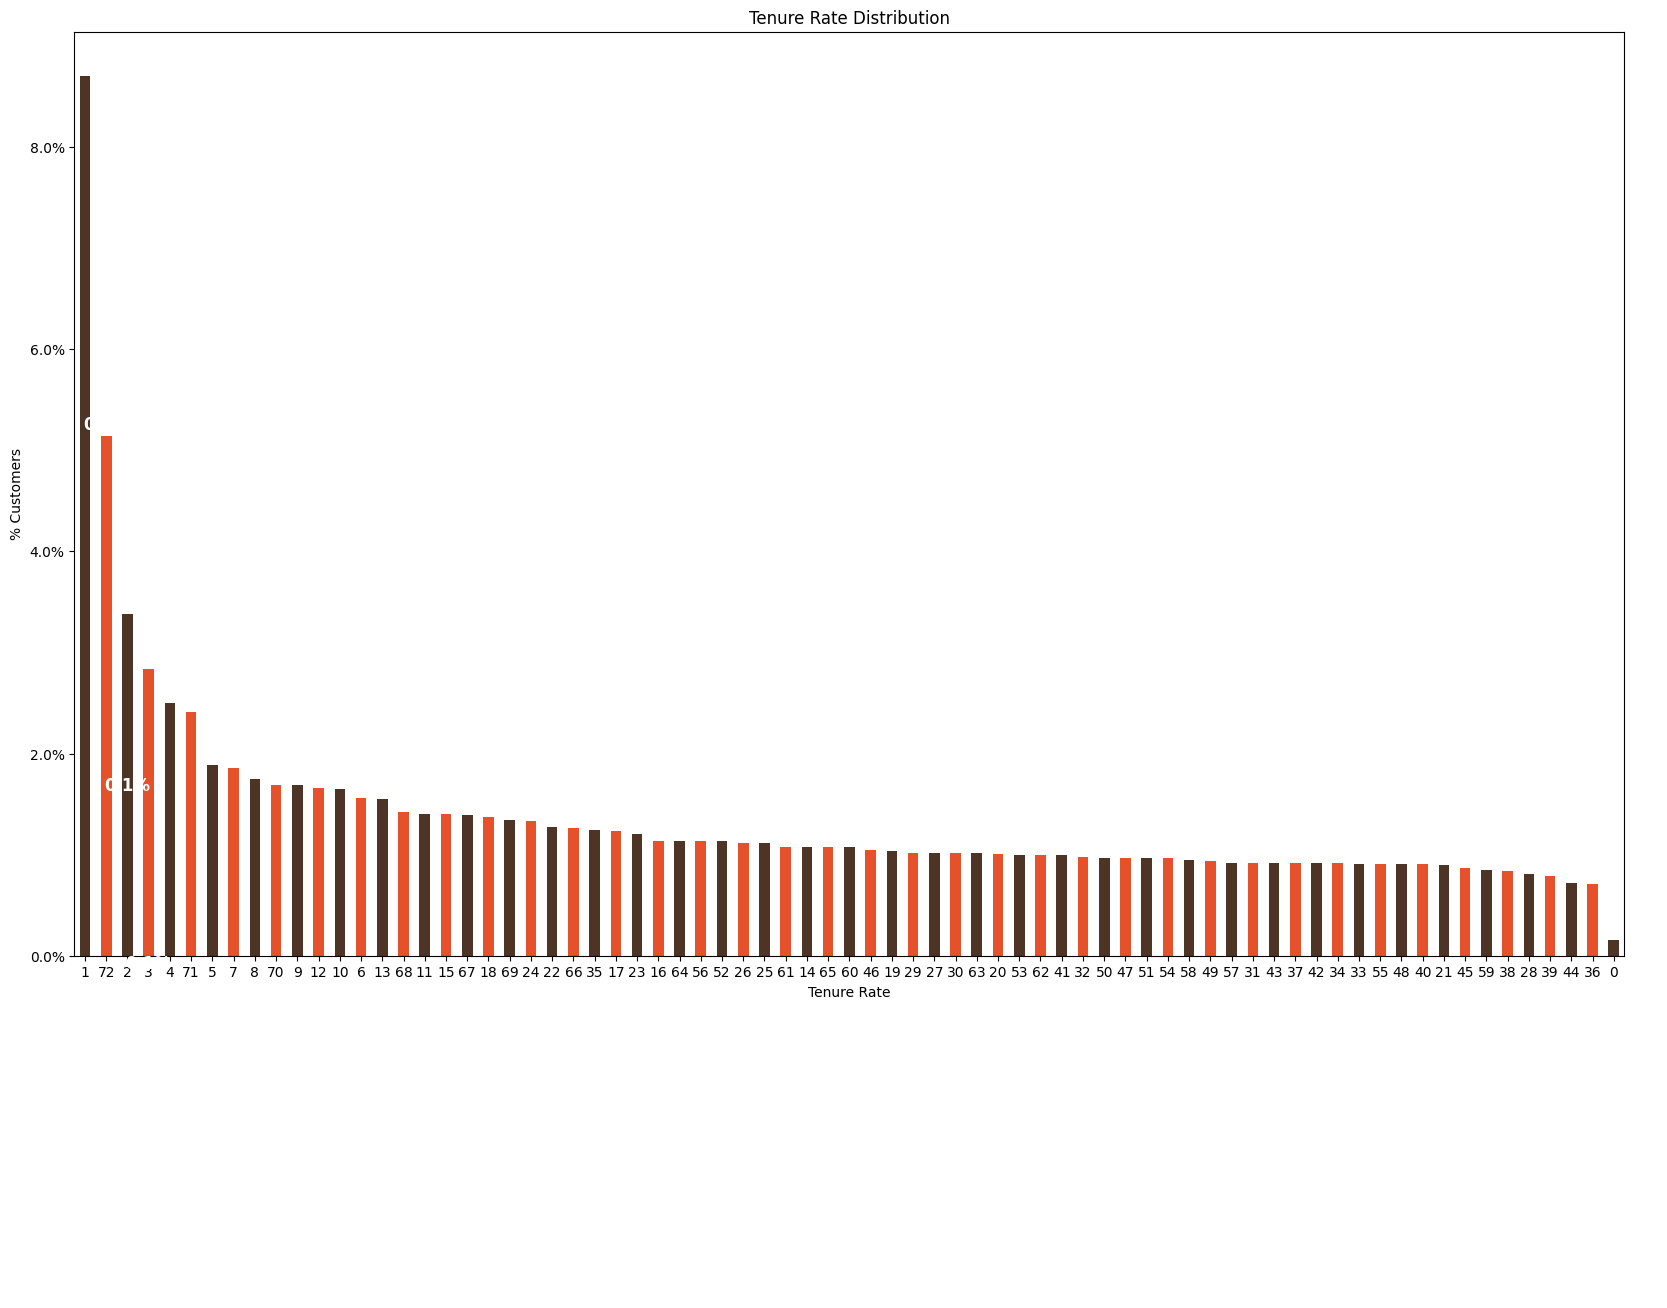

In [39]:
plt.figure(figsize=(20, 12))
barplot('tenure', '% Customers', 'Tenure Rate', 'Tenure Rate Distribution')

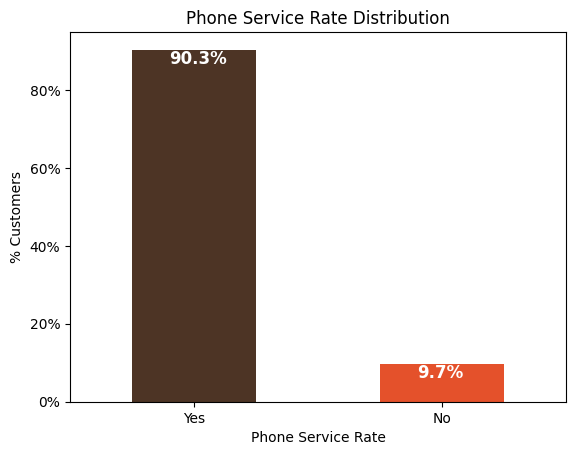

In [40]:
barplot('PhoneService', '% Customers', 'Phone Service Rate', 'Phone Service Rate Distribution')

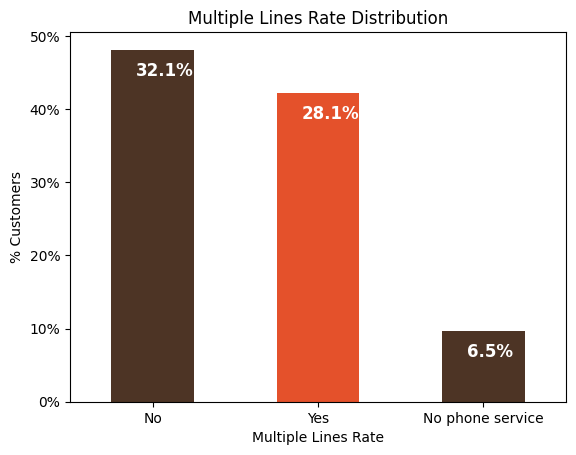

In [41]:
barplot('MultipleLines', '% Customers', 'Multiple Lines Rate', 'Multiple Lines Rate Distribution')

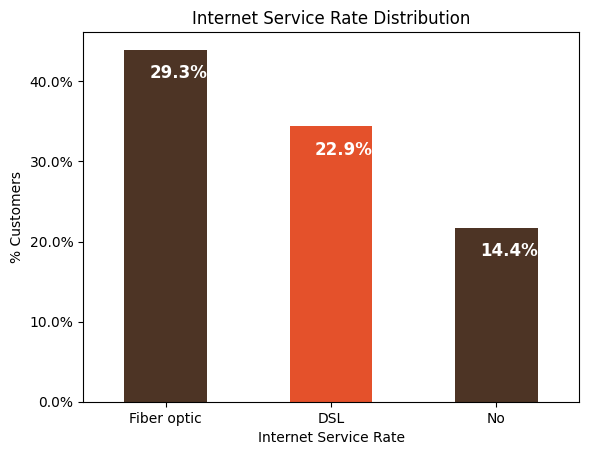

In [42]:
barplot('InternetService', '% Customers', 'Internet Service Rate', 'Internet Service Rate Distribution')

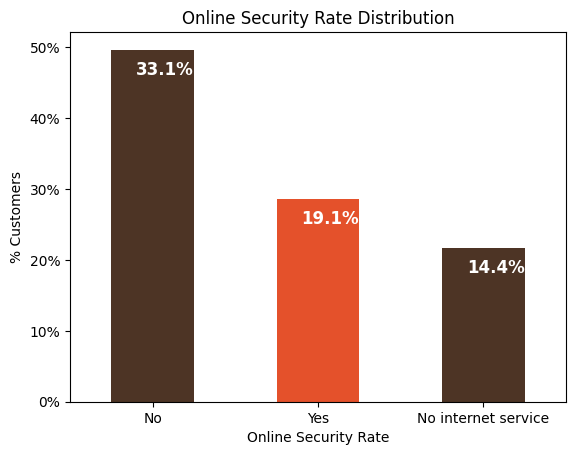

In [44]:
barplot('OnlineSecurity', '% Customers', 'Online Security Rate', 'Online Security Rate Distribution')

In [ ]:
barplot('OnlineBackup', '% Customers', 'Online Backup Rate', 'Online Security Rate Distribution')

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Pie Chart

In [ ]:
def pie(column, labels, y_label, title):
    ax = (df[column].value_counts()*100.0 /len(df))\
    .plot.pie(autopct='%.1f%%', labels = labels,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(y_label, fontsize = 12)
    ax.set_title(title, fontsize = 12);
    

In [ ]:
pie('SeniorCitizen', ['No', 'Yes'], "Senior Citizens", "% of Senior Citizens")

In [ ]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12);

# Data Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1,
                                                    y,
                                                    stratify=y.Churn,
                                                    test_size=0.1,
                                                    random_state=42
                                                   )

x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(x1,
                                                    y,
                                                    stratify=y.Churn,
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

In [ ]:
x_train

# RandomForest

In [ ]:
rfc = RandomForestClassifier()
rfc1 = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train.Churn)

In [ ]:
rfc.score(x_train, y_train.Churn)

In [ ]:
rfc.score(x_test, y_test.Churn)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
def metrics(y_test, y_pred):
    print('Accuracy: ', accuracy_score(y_test.Churn, y_pred))
    print('Precision: ', precision_score(y_test.Churn, y_pred))
    print('Recall: ', recall_score(y_test.Churn, y_pred))
    print('F_Score: ', f1_score(y_test.Churn, y_pred))
    print('Classification Report')
    print(classification_report(y_test.Churn, y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(y_test.Churn, y_pred))

In [ ]:
def CM(cm):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='coolwarm',
        linewidths=0.5
    )
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [ ]:
cm = confusion_matrix(y_test.Churn, y_pred)
CM(cm)

In [ ]:
metrics(y_test, y_pred)

In [ ]:
rfc1.fit(x_train_20, y_train_20.Churn)

In [ ]:
y_pred_20 = rfc1.predict(x_test_20)

In [ ]:
cm = confusion_matrix(y_test_20.Churn, y_pred_20)
CM(cm)

In [ ]:
metrics(y_test_20, y_pred_20)

# XGBoost

In [ ]:
xgb = XGBClassifier()
xgb1 = XGBClassifier()

In [ ]:
xgb.fit(x_train, y_train.Churn)

In [ ]:
xgb_y_pred = xgb.predict(x_test)

In [ ]:
metrics(y_test, xgb_y_pred)

In [ ]:
cm = confusion_matrix(y_test.Churn, xgb_y_pred)
CM(cm)

In [ ]:
xgb1.fit(x_train_20, y_train_20.Churn)

In [ ]:
xgb_y_pred_20 = xgb1.predict(x_test_20)

In [ ]:
cm = confusion_matrix(y_test_20.Churn, xgb_y_pred_20)
CM(cm)

In [ ]:
metrics(y_test_20, xgb_y_pred_20)

# CatBoost

In [ ]:
cb = CatBoostClassifier()
cb1 = CatBoostClassifier()

In [ ]:
cb.fit(x_train, y_train.Churn)

In [ ]:
cb_y_pred = cb.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test.Churn, cb_y_pred)
CM(cm)

In [ ]:
metrics(y_test, cb_y_pred)

In [ ]:
cb1.fit(x_train_20, y_train_20.Churn)

In [ ]:
cb_y_pred_20 = cb1.predict(x_test_20)

In [ ]:
cm = confusion_matrix(y_test_20.Churn, cb_y_pred_20)
CM(cm)

In [ ]:
metrics(y_test_20, cb_y_pred_20)

# ANN

In [ ]:
import tensorflow as tf

In [ ]:
def model_building():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='relu', input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid') 
    ])
    return model
model = model_building()
model1 = model_building()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
x_train1 = x_train.to_numpy()
x_train_20_1 = x_train_20.to_numpy()

In [ ]:
x_test1 = x_test.to_numpy()
x_test_20_1 = x_test_20.to_numpy()

In [ ]:
y_train1 = y_train.Churn.to_numpy()
y_train_20_1 = y_train_20.Churn.to_numpy()

In [ ]:
y_test1 = y_test.Churn.to_numpy()
y_test_20_1 = y_test_20.Churn.to_numpy()

In [ ]:
x_train1 = x_train1.astype(np.float32)
y_train1 = y_train1.astype(np.int32)

In [ ]:
x_test1 = x_test1.astype(np.float32)
y_test1 = y_test1.astype(np.int32)

In [ ]:
x_train_20_1 = x_train_20_1.astype(np.float32)
y_train_20_1 = y_train_20_1.astype(np.int32)

In [ ]:
x_test_20_1 = x_test_20_1.astype(np.float32)
y_test_20_1 = y_test_20_1.astype(np.int32)

In [ ]:
model.fit(x_train1, y_train1, epochs=10, batch_size=32, validation_split=0.1)

In [ ]:
ann_pred = model.predict(x_test1)

In [ ]:
ann_preds = [1 if logit >= 0.5 else 0 for logit in ann_pred]

In [ ]:
len(ann_preds)

In [ ]:
cm = confusion_matrix(y_test.Churn, ann_preds)
CM(cm)

In [ ]:
metrics(y_test, ann_preds)

In [ ]:
model1.fit(x_train_20_1, y_train_20_1, epochs=10, batch_size=32, validation_split=0.1)

In [ ]:
ann_pred_20 = model.predict(x_test_20_1)

In [ ]:
ann_preds_20 = [1 if logit >= 0.5 else 0 for logit in ann_pred_20]

In [ ]:
metrics(y_test_20, ann_preds_20)

In [ ]:
cm = confusion_matrix(y_test_20.Churn, ann_preds_20)
CM(cm)

# Hyperparameter Tuning

## CatBoost